<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
				<p></p>
به نام خدا
				<p></p>
			</font>
			<font color=#FF7500>
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
            </font>
			<p></p>
			<font color=blue>
هوش مصنوعی - دکتر محمدحسین رهبان
            </font>
			<br />
			<br />
زمستان ۱۳۹۹
		</div>
		<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
تمرین عملی اول
            	<br/>
			</font>
طراح: امیرمهدی نامجو
			<br/><br/>
موعد تحویل: ... ساعت ۲۳:۵۹  
                <br/>
                همفکری در تمامی تمرین‌های درس توصیه می‌شود. در عین حال از شما خواسته می‌شود تا تمام پیاده‌سازی را به تنهایی و بدون مشاهده کد دیگران انجام دهید.
                <br/><br/>
                <font color=red>
                لطفا در فایل ارسالی تمام بلوک‌های کد اجرا شده و شامل نمودار‌ها و خروجی‌های لازم باشند.
     </font>
                <br/>
        </style>
	</font>
</div>

نام و نام‌خانوادگی:مهسا امانی

شماره دانشجویی:97105769

نام افرادی که با آن ها مشورت کردید

در صورتی که آخرین نسخه Jupyter Notebook را نصب ندارید، با دستور زیر آن را آپدیت کرده و سپس با بستن و باز کردن مجدد صفحه به حل سوال بپردازید. (آخرین نسخه Jupyter برای نمایش مناسب زبان فارسی بدون نیاز به کد html لازم است)

In [1]:
!pip install jupyter -U
!pip install notebook -U


#If you use conda, uncomment lines below and run them.

#!conda update jupyter
#!conda update notebook

^C


# Q3

در این سوال باید مسئله فروشنده دوره گرد را به کمک Simulated Annealing حل کرده و همچنین نتایج آن را با نتایج راه حل حریصانه مقایسه کنید تا ببینید آیا بهبودی حاصل می شود یا نه. به صورت قدم قدم ابتدا از لود کردن داده‌های تست شروع کرده، سپس حل حریصانه مسئله فروشنده دوره گرد‌ را بررسی کرده و در نهایت به سراغ روش Simulated Annealing می‌رویم. 

## صورت مسئله فروشنده دوره‌گرد

گراف کامل وزن دار $G = (V,E)$ را در نظر بگیرید. یک تابع وزن $f(e)$ هم تعریف شده است که به هر یال $e \in E$ وزنی نسبت می‌دهد. هدف مسئله فروشنده دوره‌گرد پیدا کردن دوری در این گراف است که از تمامی «راس»‌ها بگذرد و بین تمامی دور‌های ممکن، کمترین وزن را داشته باشد. این مسئله در حالت کلی NP-Hard است و با فرض $P\neq NP$، الگوریتم چندجمله‌ای که جواب بهینه را به ما بدهد وجود ندارد. از این رو استفاده از الگوریتم‌های تفریبی، حریصانه و یا الگوریتم‌های هیورستیک یا فراهیورستیک (نظیر Simulated Annealing) می‌تواند در حل سریع آن و بدست آوردن جواب بهینه محلی (و نه لزوما بهینه سراسری) موثر واقع شود. شکل خاصی که در این سوال بررسی می‌کنیم، با فرض فواصل اقلیدسی است و نامساوی مثلثی برای وزن‌یال‌ها برقرار بوده و عملا به نقاط گراف به چشم شهر‌های یک نقشه مسطح نگاه می‌کنیم. البته شکل اقلیدسی این مسئله نیز همانند حالت کلی NP-Hard است و در نتیجه الگوریتم چندجمله‌ای ندارد.

## لود داده تست

داده‌های تست در قالب یک فایل به نام test.txt در کنار این فایل قرار دارند. در هر خط این داده، دو عدد قرار دارد که نشان دهنده مختصات یک شهر (یک راس گراف) است. آن‌ها را در یک لیست (لیست معمولی پایتون یا آرایه numpy) ذخیره کنید. می‌توانید هر کدام را صرفا در قالب یک تاپل ذخیره‌کنید یا کلاسی برای شهر‌ها ایجاد کنید و از هر کدام یک شی بسازید. در این زمینه محدودیتی نیست. 

In [32]:
cities = []
def load_data(path = "test.txt"):
    with open(path) as f:
        data = [tuple(map(float, row.split(' '))) for row in f]
    return data
cities = load_data()

# تابع فاصله دو شهر و تابع هزینه مسیر

در این قسمت باید تابع distance و تابع cost را تعریف کنید. تابع distance دو شهر را ورودی گرفته (با هر فرمتی که ذخیره کرده‌اید) و فاصله فیثاغورثی بین آن دو را خروجی می‌دهد. منظور از فاصله فیثاغورثی، $\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}$ است. تابع cost یک لیست از شهر‌ها ورودی گرفته که بیانگر ترتیب پیمودن شهر‌هاست. این تابع باید فاصله هر شهر با شهر بعدی را بدست آورده و در نهایت مجموع این فواصل را گزارش کند. فراموش نکنید که باید از شهر آخر به شهر اول برگردیم و فاصله این دو هم در محاسبه دخیل است.

In [33]:
from math import sqrt
def distance(city1 , city2):
    d = sqrt((city1[0] - city2[0]) ** 2 + (city1[1] - city2[1]) ** 2)
    return d

def cost(cities):
    d = 0
    for i in range(len(cities)):
        if i == len(cities) - 1:
            return d + distance(cities[0], cities[len(cities) - 1])
        d += distance(cities[i], cities[i+1])


## راه‌حل حریصانه اولیه

به عنوان راه‌حل اول مسئله را به شکل حریصانه حل کنید. از جواب بدست آمده در این بخش برای حالت شروع در قسمت Simulated Annealing استفاده خواهیم کرد و نتیجه نهایی آن را با Simulated Annealing مقایسه خواهیم کرد. در راه حل حریصانه، یک مجموعه شامل همه شهر ها در نظر بگیرید. بار اول یک شهر تصادفی را انتخاب کرده و از مجموعه خارج کنید. سپس هر بار فاصله این شهر جدید را با تمامی شهر‌ها بدست آورده و شهر با کمترین فاصله را به عنوان شهر بعدی انتخاب کنید. شهر جدید را از مجموعه خارج کرده و فرآیند را برای این شهر و سایرشهر‌های لیست ادامه دهید. این کا را تا جایی ادامه دهید که مجموعه خالی بشود. در نهایت هزینه مسیر را گزارش کنید.

In [34]:
import random
def greedy_solution(cities):
    path = []
    city = random.choice(cities)
    index = cities.index(city)
    cities.pop(index)
    path.append(city)
    while cities:
        dist = -1
        city_index = 0
        for i in range(len(cities)):
            d = distance(city, cities[i])
            if i == 0:
                 dist = d
            elif d < dist:
                dist = d
                city_index = i
            if i == len(cities) - 1:
                path.append(cities[city_index])
                city = cities[city_index]
                cities.pop(city_index)
    return path, cost(path)

# Simulated Annealing

حال به سراغ پیاده سازی روش Simulated Annealing می رویم. روشی که در این جا مد نظر داریم این است که در هر iteration از الگوریتم، یک همسایه از نقطه فعلی را انتخاب کنید. اگر هزینه همسایه از نقطه فعلی کمتر بود آن را می پذیریم و نقطه فعلی را برابر همسایه قرار می دهیم. اگر هزینه بیش‌تر بود، با احتمال خاصی باز هم نقطه را می پذیریم. دقیقا این همان قسمتی است که Simulated Annealing وارد کار می‌شود. این احتمال براساس اختلاف هزینه (یا Fitness) دو حالت و همچنین متغیری به نام دما تعیین می‌شود. این دما در طی iteration‌های مختلف تغییر می‌کند و هسته اصلی الگوریتم را می‌سازد. این که مقدار اولیه T چه چیزی باشد و چه طور تغییر کند، بسته به کاربرد متفاوت خواهد بود. این مقدار را با تست‌های مختلف خودتان تعیین کنید. متغیر T را در قسمتی که خود الگوریتم را پیاده سازی می‌کنید باید خودتان مقداردهی کنید. 

# بدست آوردن همسایه

برای تولید همسایه یک جواب، به شکل‌های مختلفی می‌توان عمل کرد. یک راه رایج این است که دو نقطه در لیست ترتیب طی کردن فعلی شهر‌ها انتخاب کرده و ترتیب ورود به شهر‌ها در آن لیست را برعکس کنید. راه‌های دیگری هم قابل تصور است. برای این کار get_neighbour را پیاده‌سازی کنید که یک لیست از ترتیب طی کردن شهر‌ها گرفته و یک لیست جدید از ترتیب طی کردن آنان ایجاد می‌کند.

In [35]:
from random import randrange

def get_neighbour(cities):
    path = cities.copy()
    x, y = randrange(len(path)), randrange(len(path))
    if x > y:
        x ,y = y, x
    path[x:y] = path[x:y][::-1]
    return path

# پیاده‌سازی احتمال پذیرفته‌شدن یک حالت 

در این قسمت تابع prob_accept را پیاده سازی‌کنید که سه عدد که نشان‌گر هزینه حالت فعلی، هزینه حالت پیشنهادی و دما است را می‌گیرد و احتمال مربوط به الگوریتم Simulated Annealing با فرمول $e^{-\Delta C / T}$ تولید می‌کند.

In [36]:
import math
def prob_accept(curr_cost , next_cost , T):
    p = math.e ** ((-(next_cost - curr_cost)) / T)
    return p

# پیاده‌سازی پذیرفته شدن یا نشدن یک حالت

در این بخش باید تابع accept را بنویسید که با گرفتن جواب فعلی و جواب احتمالی آتی و دما، مشخص کند که جواب آتی انتخاب خواهد شد یا نه. 

In [37]:
def accept(current_state , next_state , T):
    curr_cost = cost(current_state)
    next_cost = cost(next_state)
    if next_cost < curr_cost:
        return True
    rand = random.random()
    if rand < prob_accept(curr_cost, next_cost, T):
        return True
    return False


# پیاده‌سازی نهایی Simulated Annealing

در این بخش پیاده‌سازی نهایی روش باید انجام گیرد. برای آپدیت دما در هر Iteration، مقدار آن را در ضریب کوچک‌تر از ۱ نظیر $\alpha$ ضرب کنید. همچنین محدودیتی روی حداقل دمای ممکن و حداکثر تعداد Iteration‌ها تعیین کنید تا بعد از آن فرآیند به پایان برسد. هزینه حالت انتخاب شده در پایان هر Iteration را هم در یک آرایه ذخیره کنید. در قسمت بعدی به آن نیاز داریم. بهبود حدودا 7 تا 8 درصدی نسبت به راه حریصانه برای گرفتن نمره سوال کافیست. 

In [38]:
cost_list = []
def anneal(cities, stopping_temperature=1e-8, stopping_iter=5000, alpha=0.995):
    cost_list.clear()
    # Initialize with the greedy solution.
    curr_solution, curr_cost = greedy_solution(cities)
    best_solution, best_cost = curr_solution, curr_cost
    cost_list.append(curr_cost)
    iteration = 0
    temp = 50
    print("Starting annealing.")
    
    while iteration < stopping_iter and temp > stopping_temperature:
        new_sol = get_neighbour(curr_solution)
        if accept(curr_solution, new_sol, temp):
            curr_solution = new_sol
            curr_cost = cost(new_sol)
            
        if best_cost > curr_cost:
            best_cost = curr_cost
            best_solution = curr_solution
        
        cost_list.append(curr_cost)
        iteration += 1
        temp *= alpha
        
    print("Best fitness obtained: ", best_cost)
    improvement = 100 * (cost_list[0] - best_cost) / (cost_list[0])
    print(f"Improvement over greedy heuristic: {improvement : .2f}%")
    return best_solution , best_cost

In [39]:
best_solution , best_cost = anneal(cities)

Starting annealing.
Best fitness obtained:  633.0387221773256
Improvement over greedy heuristic:  13.59%


# مصورسازی

نمودار هزینه جواب بدست آمده در پایان هر Iteration را بر حسب شماره Iteration رسم کنید. 

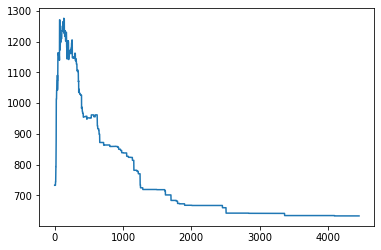

In [40]:
import matplotlib.pyplot as plt

def plot_cost(cost_list):
    plt.plot(cost_list)
    
plot_cost(cost_list)

نقاطی که در جواب بدست آمده را روی نمودار نشان داده و به ترتیبی که دیده شده‌اند با خط به یکدیگر وصل کنید.

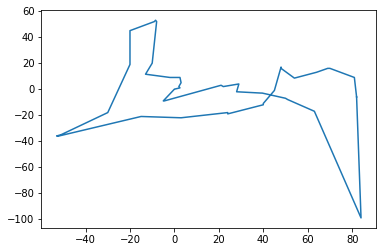

In [41]:
import matplotlib.pyplot as plt

def plot_path(best_solution):
    x_val = [x[0] for x in best_solution]
    y_val = [x[1] for x in best_solution]
    x_val.append(best_solution[0][0])
    y_val.append(best_solution[0][1])
    plt.plot(x_val,y_val)
    
plot_path(best_solution)